In [26]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('PE Assignment dataset Jan-Apr 2023 IMR_MMR_PIA - Sheet1.csv')

# (a) Find correlations
correlation_imr_anc = df[['Infant Mortality Rate', 'ANC_IMR']].corr().iloc[0, 1]
correlation_mmr_anc = df[['Maternal Mortality Rate', 'ANC_MMR']].corr().iloc[0, 1]

print(f'Correlation between IMR and ANC_IMR: {correlation_imr_anc}')
print(f'Correlation between MMR and ANC_MMR: {correlation_mmr_anc}')

# (b) Choose ANC column with the strongest correlation
if abs(correlation_imr_anc) > abs(correlation_mmr_anc):
    selected_anc_column = 'ANC_IMR'
else:
    selected_anc_column = 'ANC_MMR'
    
print("(b) Selected ANC column:", selected_anc_column)

# Perform simple linear regression for IMR
X_imr = sm.add_constant(df[selected_anc_column])
y_imr = df['Infant Mortality Rate']
model_imr = sm.OLS(y_imr, X_imr).fit()
m_imr, c_imr = model_imr.params

# Predicted change in IMR for ANC+20% and ANC-20%
anc_increase = 1.2 * df[selected_anc_column]
anc_decrease = 0.8 * df[selected_anc_column]

change_imr_increase = m_imr * anc_increase + c_imr - y_imr
change_imr_decrease = m_imr * anc_decrease + c_imr - y_imr

print(f'Predicted Change in IMR for ANC+20%: {change_imr_increase.mean()}')
print(f'Predicted Change in IMR for ANC-20%: {change_imr_decrease.mean()}')

# Perform simple linear regression for MMR using the same X_imr
y_mmr = df['Maternal Mortality Rate']
model_mmr = sm.OLS(y_mmr, X_imr).fit()
m_mmr, c_mmr = model_mmr.params

# Predicted change in MMR for ANC+20% and ANC-20%
change_mmr_increase = m_mmr * anc_increase + c_mmr - y_mmr
change_mmr_decrease = m_mmr * anc_decrease + c_mmr - y_mmr

print(f'Predicted Change in MMR for ANC+20%: {change_mmr_increase.mean()}')
print(f'Predicted Change in MMR for ANC-20%: {change_mmr_decrease.mean()}')

# (c) Generate normalized values using MinMaxScaler
scaler = MinMaxScaler()

normalized_change_increase_imr = scaler.fit_transform(change_imr_increase.values.reshape(-1, 1))
normalized_change_decrease_imr = scaler.fit_transform(change_imr_decrease.values.reshape(-1, 1))
normalized_change_increase_mmr = scaler.fit_transform(change_mmr_increase.values.reshape(-1, 1))
normalized_change_decrease_mmr = scaler.fit_transform(change_mmr_decrease.values.reshape(-1, 1))

print(f'Impact Score IMR (ANCV+20%): {normalized_change_increase_imr.mean()}')
print(f'Impact Score IMR (ANCV-20%): {normalized_change_decrease_imr.mean()}')
print(f'Impact Score MMR (ANCV+20%): {normalized_change_increase_mmr.mean()}')
print(f'Impact Score MMR (ANCV-20%): {normalized_change_decrease_mmr.mean()}')

# (d) Visualize results
# Assuming df['Stress'] is a column representing stress values at the Taluka level
stability_increase = 1 - df['Stress (ANC+20%)']
stability_decrease = 1 - df['Stress (ANC-20%)']

# Plot Stability vs Impact(ANCV+20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase, y=normalized_change_increase_imr.flatten(), label='ANCV+20%', color='blue')
plt.title('Stability vs Impact (ANCV+20%) for IMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease, y=normalized_change_decrease_imr.flatten(), label='ANCV-20%', color='red')
plt.title('Stability vs Impact (ANCV-20%) for IMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV-20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV+20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase, y=normalized_change_increase_mmr.flatten(), label='ANCV+20%', color='green')
plt.title('Stability vs Impact (ANCV+20%) for MMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease, y=normalized_change_decrease_mmr.flatten(), label='ANCV-20%', color='purple')
plt.title('Stability vs Impact (ANCV-20%) for MMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV-20%)')
plt.legend()
plt.show()


Correlation between IMR and ANC_IMR: 0.15062990361136588
Correlation between MMR and ANC_MMR: 0.1881543399064031

(b) Selected ANC column: ANC_MMR


In [27]:
# Perform simple linear regression for IMR
X = sm.add_constant(df[selected_anc_column])
y_imr = df['Infant Mortality Rate']
model_imr = sm.OLS(y_imr, X).fit()
m_imr, c_imr = model_imr.params

# Predicted change in IMR for ANC+20% and ANC-20%
anc_increase = 1.2 * df[selected_anc_column]
anc_decrease = 0.8 * df[selected_anc_column]

change_imr_increase = m_imr * anc_increase + c_imr - y_imr
change_imr_decrease = m_imr * anc_decrease + c_imr - y_imr

print(f'Predicted Change in IMR for ANC+20%: {change_imr_increase.mean()}')
print(f'Predicted Change in IMR for ANC-20%: {change_imr_decrease.mean()}')

# Perform simple linear regression for MMR using the same X_imr
y_mmr = df['Maternal Mortality Rate']
model_mmr = sm.OLS(y_mmr, X).fit()
m_mmr, c_mmr = model_mmr.params

# Predicted change in MMR for ANC+20% and ANC-20%
change_mmr_increase = m_mmr * anc_increase + c_mmr - y_mmr
change_mmr_decrease = m_mmr * anc_decrease + c_mmr - y_mmr

print(f'Predicted Change in MMR for ANC+20%: {change_mmr_increase.mean()}')
print(f'Predicted Change in MMR for ANC-20%: {change_mmr_decrease.mean()}')

Predicted Change in IMR for ANC+20%: 207.47417247248237
Predicted Change in IMR for ANC-20%: 131.3634737991806
Predicted Change in MMR for ANC+20%: 581.5226511524785
Predicted Change in MMR for ANC-20%: 364.5399132015336


In [28]:
# (c)
# (i) Generate normalized values using MinMaxScaler
scaler = MinMaxScaler()

normalized_change_increase_imr = scaler.fit_transform(change_imr_increase.values.reshape(-1, 1))
normalized_change_decrease_imr = scaler.fit_transform(change_imr_decrease.values.reshape(-1, 1))
normalized_change_increase_mmr = scaler.fit_transform(change_mmr_increase.values.reshape(-1, 1))
normalized_change_decrease_mmr = scaler.fit_transform(change_mmr_decrease.values.reshape(-1, 1))

print(f'Impact Score IMR (ANCV+20%): {normalized_change_increase_imr.mean()}')
print(f'Impact Score IMR (ANCV-20%): {normalized_change_decrease_imr.mean()}')
print(f'Impact Score MMR (ANCV+20%): {normalized_change_increase_mmr.mean()}')
print(f'Impact Score MMR (ANCV-20%): {normalized_change_decrease_mmr.mean()}')

Impact Score IMR (ANCV+20%): 0.3320902215556705
Impact Score IMR (ANCV-20%): 0.3564366149155169
Impact Score MMR (ANCV+20%): 0.3264245499925213
Impact Score MMR (ANCV-20%): 0.35130115171466225


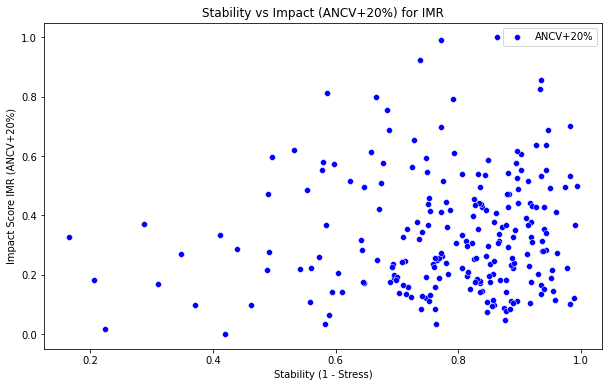

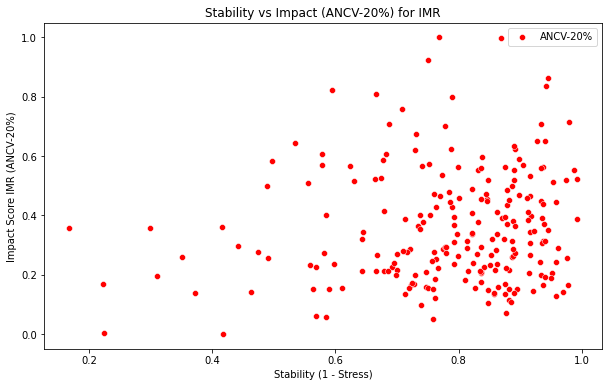

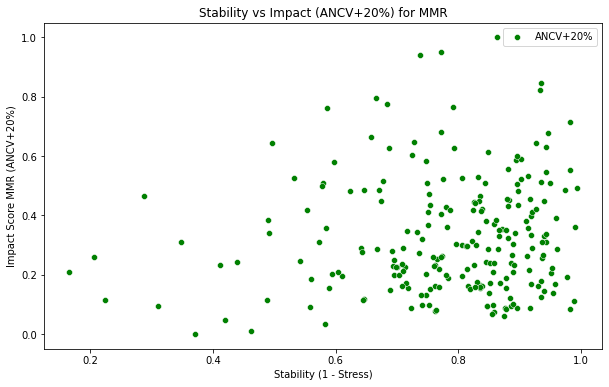

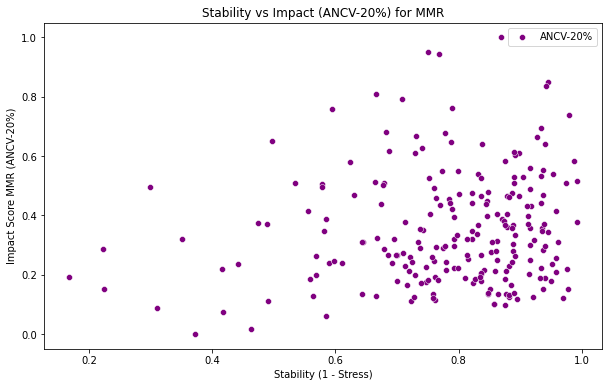

In [29]:
# (ii) Visualize results
# Assuming df['Stress'] is a column representing stress values at the Taluka level
stability_increase = 1 - df['Stress (ANC+20%)']
stability_decrease = 1 - df['Stress (ANC-20%)']

# Plot Stability vs Impact(ANCV+20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase, y=normalized_change_increase_imr.flatten(), label='ANCV+20%', color='blue')
plt.title('Stability vs Impact (ANCV+20%) for IMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease, y=normalized_change_decrease_imr.flatten(), label='ANCV-20%', color='red')
plt.title('Stability vs Impact (ANCV-20%) for IMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV-20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV+20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase, y=normalized_change_increase_mmr.flatten(), label='ANCV+20%', color='green')
plt.title('Stability vs Impact (ANCV+20%) for MMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease, y=normalized_change_decrease_mmr.flatten(), label='ANCV-20%', color='purple')
plt.title('Stability vs Impact (ANCV-20%) for MMR')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV-20%)')
plt.legend()
plt.show()

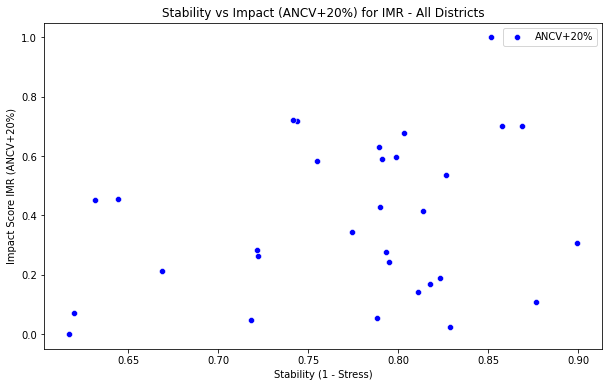

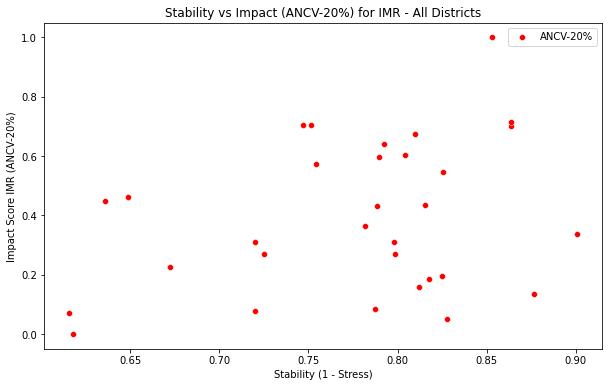

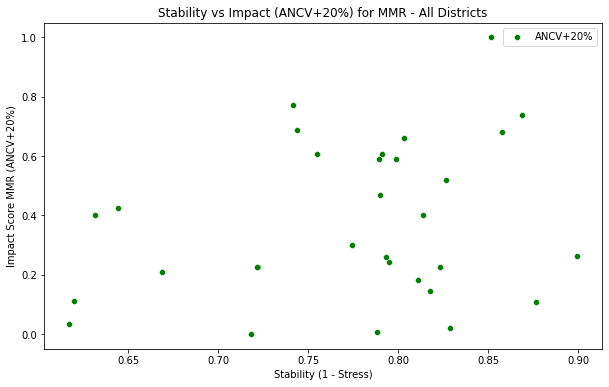

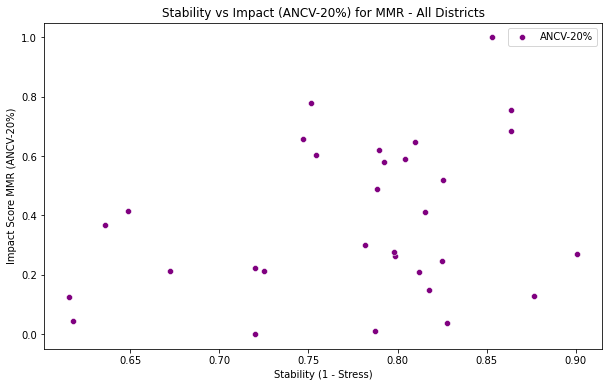

In [37]:
# (d.) Aggregate (average) the data for all districts of Karnataka
average_df = df.groupby('District').mean().reset_index()

# Assuming average_df['Stress'] is a column representing stress values at the District level
stability_increase_district = 1 - average_df['Stress (ANC+20%)']
stability_decrease_district = 1 - average_df['Stress (ANC-20%)']

# Predicted change in IMR and MMR for all districts
change_imr_increase_district = m_imr * (1.2 * average_df[selected_anc_column]) + c_imr - average_df['Infant Mortality Rate']
change_imr_decrease_district = m_imr * (0.8 * average_df[selected_anc_column]) + c_imr - average_df['Infant Mortality Rate']

change_mmr_increase_district = m_mmr * (1.2 * average_df[selected_anc_column]) + c_mmr - average_df['Maternal Mortality Rate']
change_mmr_decrease_district = m_mmr * (0.8 * average_df[selected_anc_column]) + c_mmr - average_df['Maternal Mortality Rate']

# Generate normalized values using MinMaxScaler
scaler_district = MinMaxScaler()

normalized_change_increase_imr_district = scaler_district.fit_transform(change_imr_increase_district.values.reshape(-1, 1))
normalized_change_decrease_imr_district = scaler_district.fit_transform(change_imr_decrease_district.values.reshape(-1, 1))
normalized_change_increase_mmr_district = scaler_district.fit_transform(change_mmr_increase_district.values.reshape(-1, 1))
normalized_change_decrease_mmr_district = scaler_district.fit_transform(change_mmr_decrease_district.values.reshape(-1, 1))

# Visualize results for all districts
# Plot Stability vs Impact(ANCV+20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase_district, y=normalized_change_increase_imr_district.flatten(), label='ANCV+20%', color='blue')
plt.title('Stability vs Impact (ANCV+20%) for IMR - All Districts')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for IMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease_district, y=normalized_change_decrease_imr_district.flatten(), label='ANCV-20%', color='red')
plt.title('Stability vs Impact (ANCV-20%) for IMR - All Districts')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score IMR (ANCV-20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV+20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_increase_district, y=normalized_change_increase_mmr_district.flatten(), label='ANCV+20%', color='green')
plt.title('Stability vs Impact (ANCV+20%) for MMR - All Districts')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV+20%)')
plt.legend()
plt.show()

# Plot Stability vs Impact(ANCV-20%) for MMR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stability_decrease_district, y=normalized_change_decrease_mmr_district.flatten(), label='ANCV-20%', color='purple')
plt.title('Stability vs Impact (ANCV-20%) for MMR - All Districts')
plt.xlabel('Stability (1 - Stress)')
plt.ylabel('Impact Score MMR (ANCV-20%)')
plt.legend()
plt.show()
